In [1]:
import json

In [2]:
f = "data/countries.geojson"
with open(f, 'r') as infile:
    g = json.load(infile)

In [3]:
g.keys()

[u'type', u'features']

In [4]:
n_features = len(g['features'])
n_features

255

In [5]:
polygons = []
multipolygons = []
for i, feature in enumerate(g['features']):
    if feature['geometry']['type'] == 'Polygon':
        n_p = len(feature['geometry']['coordinates'])
        polygons.append((i,n_p))
    elif feature['geometry']['type'] == 'MultiPolygon':
        n_p = len(feature['geometry']['coordinates'])
        multipolygons.append((i,n_p))

In [6]:
len(polygons)

105

In [7]:
len(multipolygons)

150

In [8]:
multipolygons[:5]

[(2, 3), (3, 2), (5, 16), (7, 10), (8, 8)]

In [9]:
len(feature['geometry']['coordinates'][0])

766

In [10]:
c = feature['geometry']['coordinates']

In [11]:
feature.keys()

[u'geometry', u'type', u'properties']

In [12]:
feature['properties']

{u'ADMIN': u'Zimbabwe', u'ISO_A3': u'ZWE'}

In [13]:
feature['type']

u'Feature'

In [14]:
feature['geometry']['type']

u'Polygon'

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


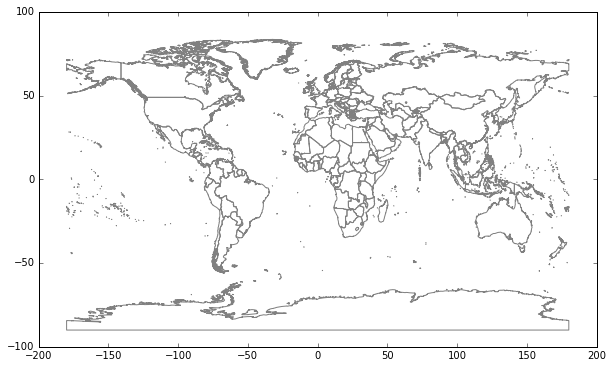

In [17]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')

In [46]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv')

In [47]:
participants2017

,name,email,lat,lon,affiliation
0,Daidai Shen,dshen3@uncc.edu,35.307093,-80.735164,University of North Carolina at Charlotte
1,Michael Reilly,mkreilly@gmail.com,41.081437,-73.818223,Columbia University
2,Kai Cao,caokaisqtv@gmail.com,1.299257,103.773763,National University of Singapore
3,Yang Yang,zoeyangyang@gmail.com,1.297510,103.770684,National University of Singapore
4,Long Wang,wanglong@u.nus.edu,1.297477,103.770483,National University of Singapore
5,Dustin Frye,dufrye@vassar.edu,41.686047,-73.897342,Vassar College
6,Cristina Ibarra Armenta,cibarra@uas.edu.mx,24.825252,-107.381750,Universidad Aut�noma de Sinaloa
7,Cristina Miller,cmiller@ers.usda.gov,38.886768,-77.030001,U.S. Department of Agriculture
8,Sudhir Thakur,thakurs@csus.edu,38.567158,-121.426703,"California State University, Sacramento"
9,Gabriel Granco,ggranco@k-state.edu,39.859249,-75.783142,Stroud Water Research Cente


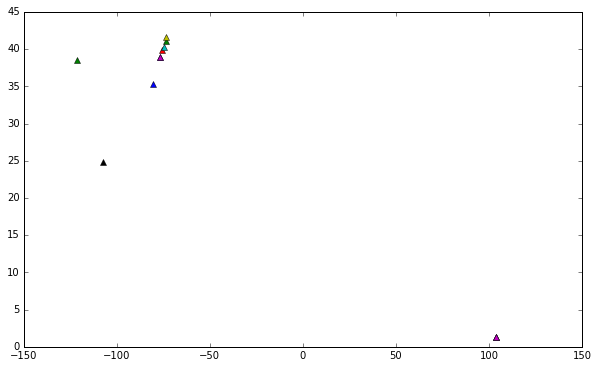

In [38]:
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')

In [23]:
p['lon']

-77.030001

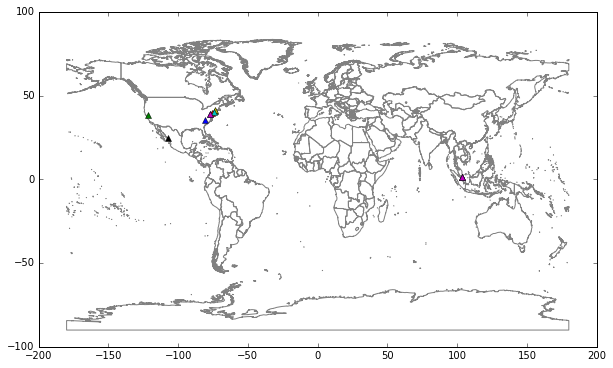

In [39]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')     
    

In [25]:
vancouver = (-123.120542, 49.285095)

In [26]:
import pyproj

In [27]:
geod = pyproj.Geod(ellps='WGS84')

In [28]:
gcd = geod.inv(vancouver[0], vancouver[1], 27.9977, -26.1836)
gcd

(54.303648919266344, -36.23307084304412, 16441913.15341734)

In [29]:
gcd[-1] * 0.000621371

10216.528018052086

In [30]:
waypoints = geod.npts(vancouver[0], vancouver[1], 27.9977, -26.1836, 20)


In [31]:
waypoints

[(-113.62449174255278, 53.02493537702134),
 (-102.5695610234907, 55.87362127378938),
 (-90.14535416287953, 57.59350558972551),
 (-76.9803257244773, 58.00117978092088),
 (-64.0123793314896, 57.04772521256818),
 (-52.09200843052379, 54.844116395375),
 (-41.6665395813382, 51.60600629966616),
 (-32.77861902929462, 47.57129344061538),
 (-25.242219444522405, 42.94703787381407),
 (-18.80050580674427, 37.893645841843515),
 (-13.20752462344089, 32.52923061774788),
 (-8.255407119322044, 26.939737195635505),
 (-3.7761137329229655, 21.188487855535143),
 (0.3655554864024424, 15.323528073554593),
 (4.2805939918934826, 9.382908746242506),
 (8.06374137700007, 3.398457242295385),
 (11.800362725888021, -2.6014271128202786),
 (15.572539861647556, -8.589518773040517),
 (19.46486245718387, -14.537696867856837),
 (23.57044944646887, -20.414734884675596)]

In [32]:
#route = [minn]
route = [vancouver]
route.extend(waypoints)
route.append((27.9977, -26.1836))

In [33]:
route = np.array(route)

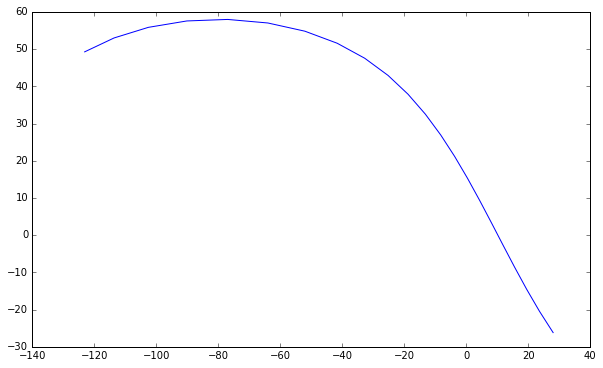

In [34]:
plot(route[:,0], route[:,1])

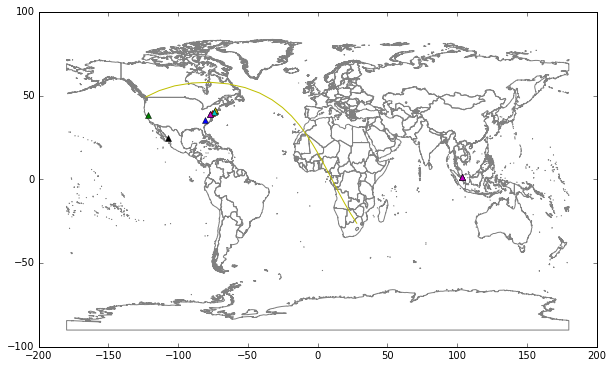

In [40]:
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^')     

plot(route[:,0], route[:,1])

## On your own

1. Calculate and plot the great circle routes bringing our participants to the workshop.

# Solution

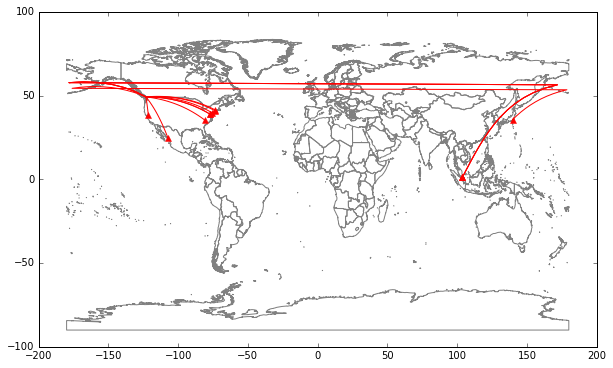

In [52]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='r')

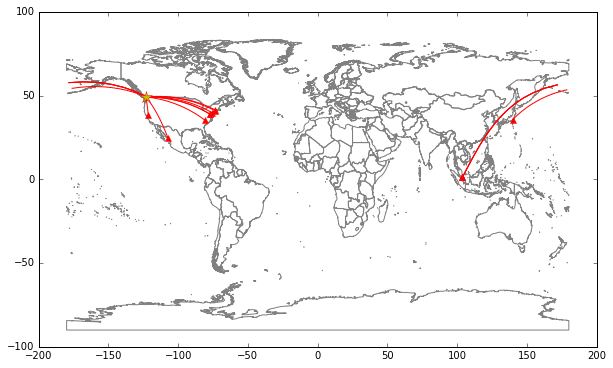

In [83]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv')
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)

### Plot the great circle routes bringing our participants to the workshop in 2016

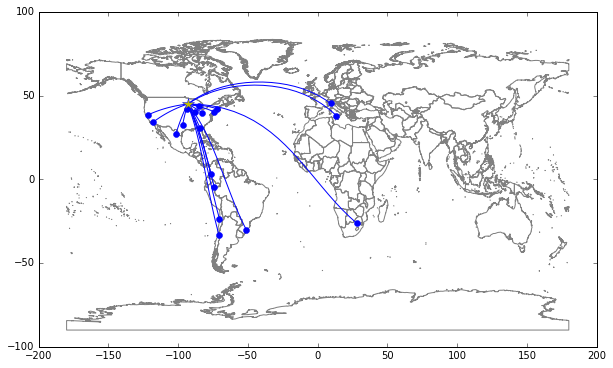

In [84]:
import pandas as pd
participants2016 = pd.read_csv('data/participants2016.csv')
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)

### Plot the great circle routes bringing our participants to the workshop in 2016(blue) & 2017(red)

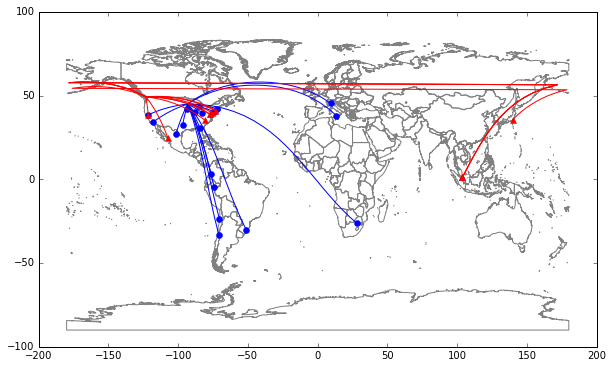

In [78]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv')
participants2016 = pd.read_csv('data/participants2016.csv')
vancouver = (-123.120542, 49.285095)
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='r')

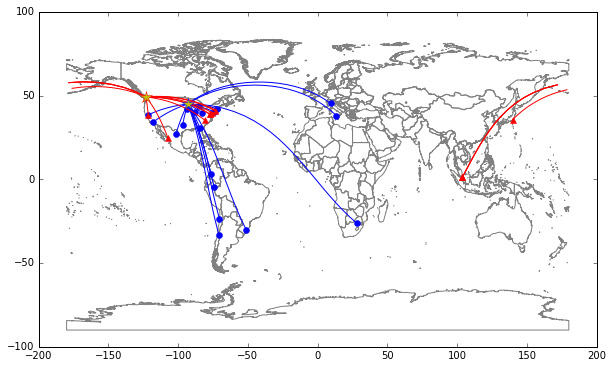

In [87]:
import pandas as pd
participants2017 = pd.read_csv('data/participants2017.csv')
participants2016 = pd.read_csv('data/participants2016.csv')
vancouver = (-123.120542, 49.285095)
minn = (-93.2550, 44.9778)
from shapely.geometry import shape
for feature in g['features']:
    sf = shape(feature['geometry'])
    if feature['geometry']['type'] == 'MultiPolygon':
        for geom in sf.geoms:
            plot(*geom.exterior.xy, color='grey')
    else:
        plot(*sf.exterior.xy, color='grey')
    
for idx, p in participants2016.iterrows():
    plot(p['lon'], p['lat'], 'o', markerfacecolor='b', markeredgecolor='b')     
    
for idx, p in participants2017.iterrows():
    plot(p['lon'], p['lat'], '^', markerfacecolor='r', markeredgecolor='r')     


for idx, p in participants2016.iterrows():
    waypoints = geod.npts(minn[0], minn[1], p['lon'], p['lat'], 20)
    route = [minn]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    plot(route[:,0], route[:,1], color='b')

for idx, p in participants2017.iterrows():
    waypoints = geod.npts(vancouver[0], vancouver[1], p['lon'], p['lat'], 20)
    route = [vancouver]
    route.extend(waypoints)
    route.append((p['lon'], p['lat']))
    route = np.array(route)
    if (route[:,0].max()-route[:,0].min())>180:
        min_index = route[:,0].argmin()+1
        plot(route[:min_index,0], route[:min_index,1], color='r')
        plot(route[min_index:,0], route[min_index:,1], color='r')
        continue
    plot(route[:,0], route[:,1], color='r')
plot(vancouver[0],vancouver[1],  '*', markerfacecolor='y', markeredgecolor='r', markersize=12)
plot(minn[0],minn[1],  '*', markerfacecolor='y', markeredgecolor='b', markersize=12)